In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
#데이터 불러오기
mental_df = pd.read_csv('Mental Health Dataset.csv')

In [5]:
#데이터 확인하기
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [7]:
#데이터 확인하기
mental_df.tail()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292363,2/1/2016 23:04,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [9]:
#데이터 확인하기
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [11]:
#데이터 확인하기
mental_df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [17]:
#결측치 확인하기
mental_df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [19]:
# custom_encoding
mapping = {'Yes': 1, 'High': 1, 'No': 0, 'Low': 0, 'Not sure': 0.5, 'Maybe': 0.5, 'Medium': 0.5}
mental_df = mental_df.replace(mapping)

In [21]:
# 'self_employed' 내 결측치 항목 0.5로 처리 후 결측치 처리 여부 확인
mental_df['self_employed'] = mental_df['self_employed'].fillna(0.5)
mental_df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [23]:
# 레이블 인코딩을 위한 LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# custom_encoding된 열을 제외하고 나머지 열 레이블 인코딩 진행
for column in mental_df.columns:
    if mental_df[column].dtype == 'object':
        mental_df[column] = label_encoder.fit_transform(mental_df[column])

In [25]:
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,39,0,34,1,0.5,0,1,0,1.0,0.0,1.0,0.5,0,0.0,1.0,0.0,0.5
1,41,0,34,1,0.5,1,1,0,1.0,0.0,1.0,0.5,0,0.0,1.0,0.0,0.0
2,42,0,34,1,0.5,1,1,0,1.0,0.0,1.0,0.5,0,0.0,1.0,0.0,1.0
3,47,0,34,1,0.0,1,1,0,1.0,0.0,1.0,0.5,0,0.0,1.0,0.5,1.0
4,52,0,34,1,0.0,1,1,0,1.0,0.0,1.0,0.5,0,0.0,1.0,0.0,1.0


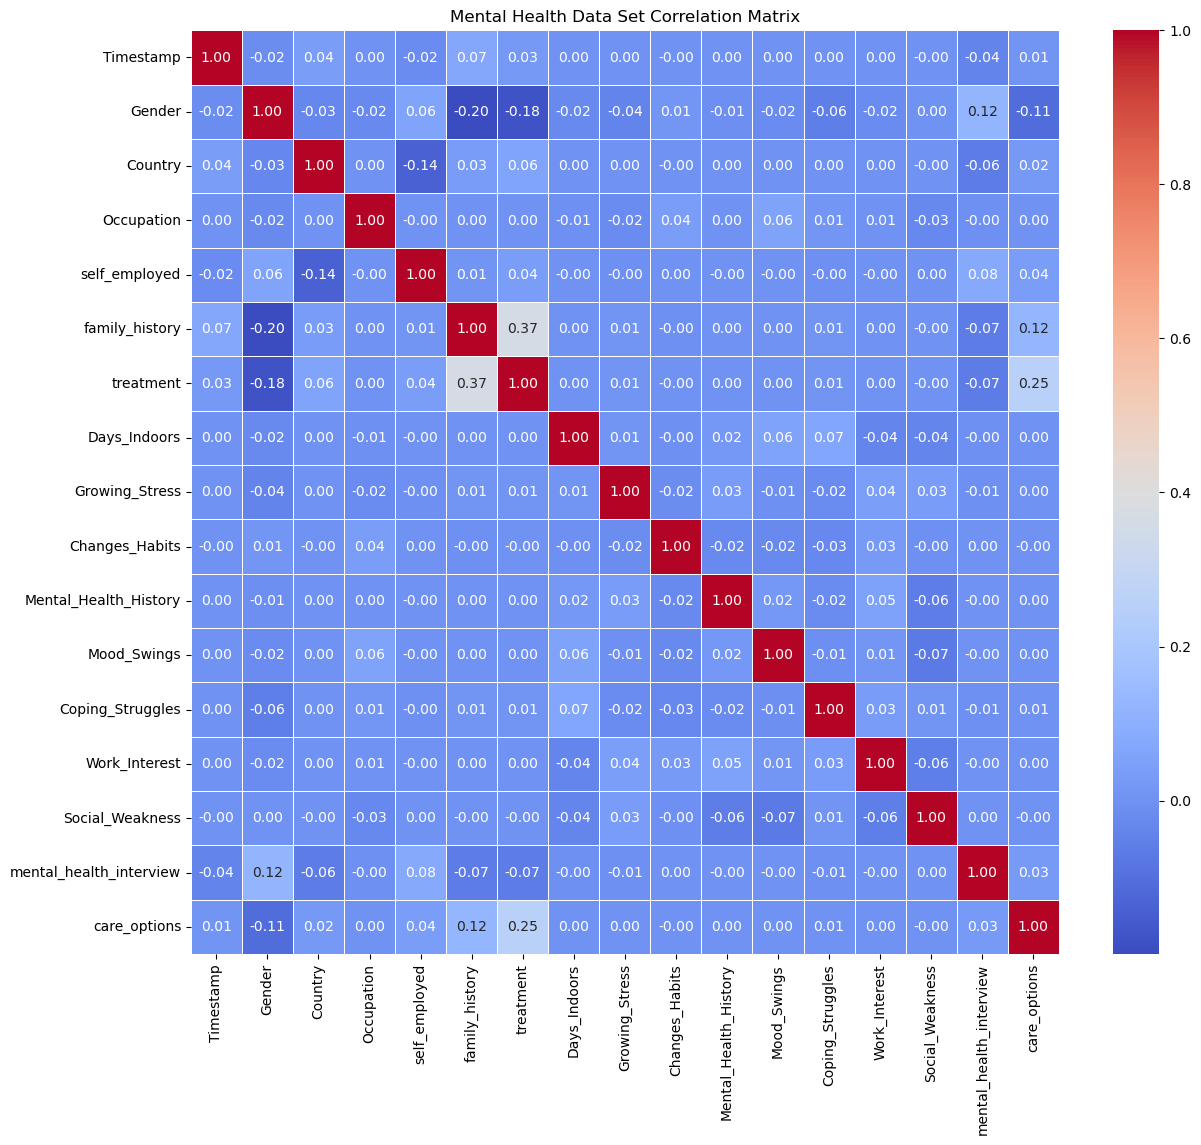

In [35]:
# 상관 행렬 계산
correlation_matrix = mental_df.corr()

# 상관 행렬 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Mental Health Data Set Correlation Matrix')
# 그래프 이미지 저장
plt.savefig('Mental_Health_Data_Set_Correlation_Matrix.png', dpi=300)

plt.show()

# 컬럼별 분포도 확인

In [7]:
#데이터 불러오기
mental_df = pd.read_csv('Mental Health Dataset.csv')
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [11]:
# 결측치 'No response' 처리
mental_df['self_employed'].fillna('No response', inplace=True)
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No response,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


## Gender

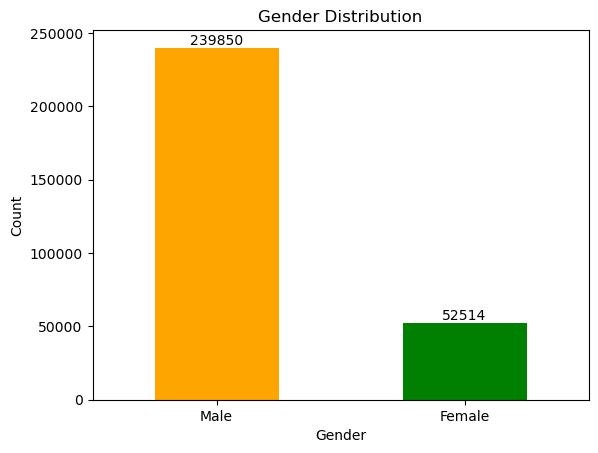

In [57]:
# 응답자 gender 분포 확인
# gender별 값 세기
gender_counts = mental_df['Gender'].value_counts()

# 바 플롯 생성
ax = gender_counts.plot(kind='bar', color=['orange', 'green'])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('Gender Distribution')

plt.savefig('Gender_Distribution.png', dpi=300)

plt.show()

## Country

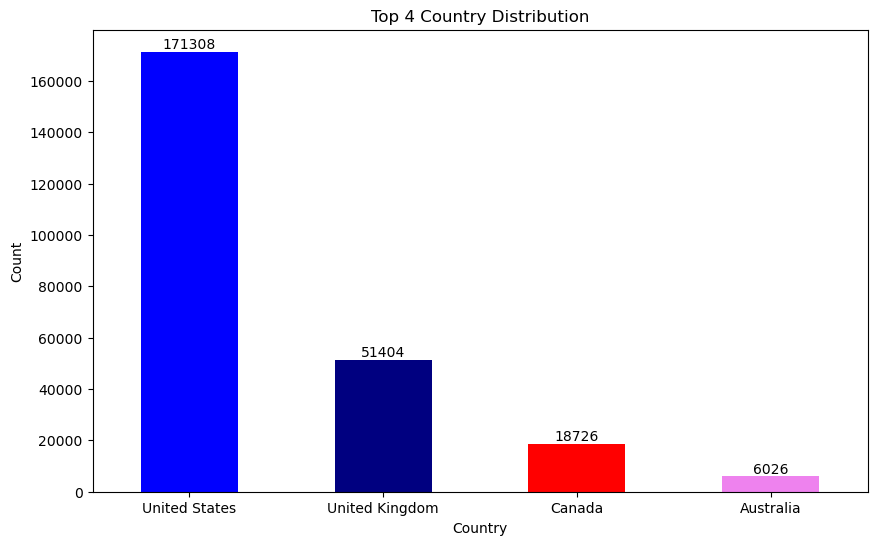

In [122]:
# 응답자 Country 분포 확인
# Country별 값 세기
Country_counts = mental_df['Country'].value_counts()

plt.figure(figsize=(10, 6))

# 상위 4개 국가만 추출
top_4_country = Country_counts.head(4)

# 바 플롯 생성
ax = top_4_country.plot(kind='bar', color=['Blue' ,'Navy', 'red', 'violet'], width=0.5)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('Country')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('Top 4 Country Distribution')

plt.savefig('Top_4_Country_Distribution.png', dpi=300)

plt.show()

## self_employed

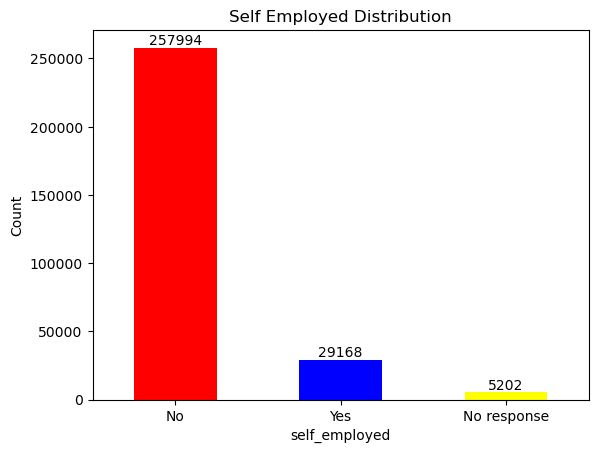

In [63]:
# 응답자 self_employed 분포 확인
# self_employed별 값 세기
self_employed_counts = mental_df['self_employed'].value_counts()

# 바 플롯 생성
ax = self_employed_counts.plot(kind='bar', color=['red', 'blue', 'yellow'])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('self_employed')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('Self Employed Distribution')

plt.savefig('Self_Employed_Distribution.png', dpi=300)

plt.show()

## Family_history

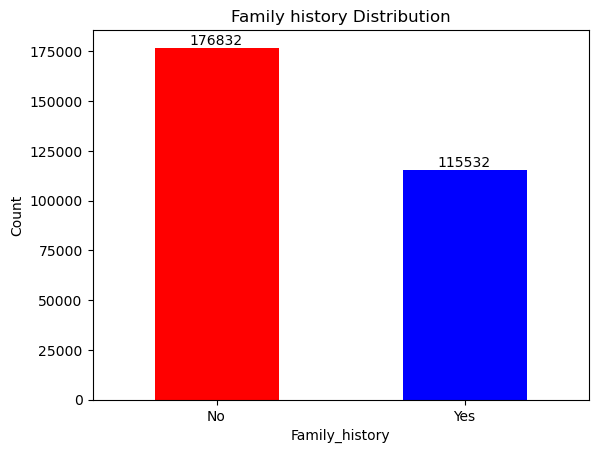

In [80]:
# 응답자 Family_history 분포 확인
# Family_history별 값 세기
Family_history_counts = mental_df['family_history'].value_counts()

# 바 플롯 생성
ax = Family_history_counts.plot(kind='bar', color=['red', 'blue'])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('Family_history')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('Family history Distribution')

plt.savefig('Family_History_Distribution.png', dpi=300)

plt.show()

## Mental_health_interview

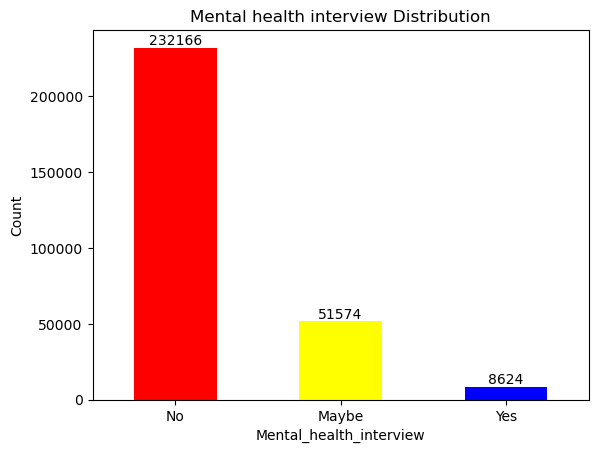

In [88]:
# 응답자 Mental_health_interview 분포 확인
# Mental_health_interview별 값 세기
Mental_health_interview_counts = mental_df['mental_health_interview'].value_counts()

# 바 플롯 생성
ax = Mental_health_interview_counts.plot(kind='bar', color=['red', 'yellow', 'blue'])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('Mental_health_interview')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('Mental health interview Distribution')

plt.savefig('Mental_health_interview_Distribution.png', dpi=300)

plt.show()

## care_options

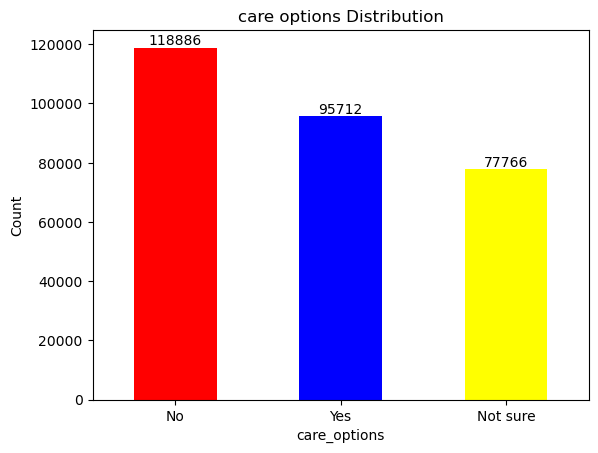

In [95]:
# 응답자 care_options 분포 확인
# care_options별 값 세기
care_options_counts = mental_df['care_options'].value_counts()

# 바 플롯 생성
ax = care_options_counts.plot(kind='bar', color=['red', 'blue', 'yellow'])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

# 축 이름 설정
plt.xlabel('care_options')
plt.ylabel('Count')

plt.xticks(rotation=0)

# 제목 설정
plt.title('care options Distribution')

plt.savefig('care_options_Distribution.png', dpi=300)

plt.show()